In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from tqdm import tqdm
import json
import numpy as np
from report import read_dfs, index_dfs
from report import generate_bar_chart, generate_bar_chart_overlay
from report import report_gridsearch
from report import read_accs
from report import imagenet_files as files

np.set_printoptions(suppress=True, linewidth=np.inf)
plt.rcParams.update({'font.size': 6})

logdir = 'results/gridsearch-imagenet'

# Core attacks

In [3]:
attacks = ['jpeg', 'elastic', 'wood', 'glitch', 'kaleidoscope', 'pixel', 'snow', 'gabor']

## Low distortion

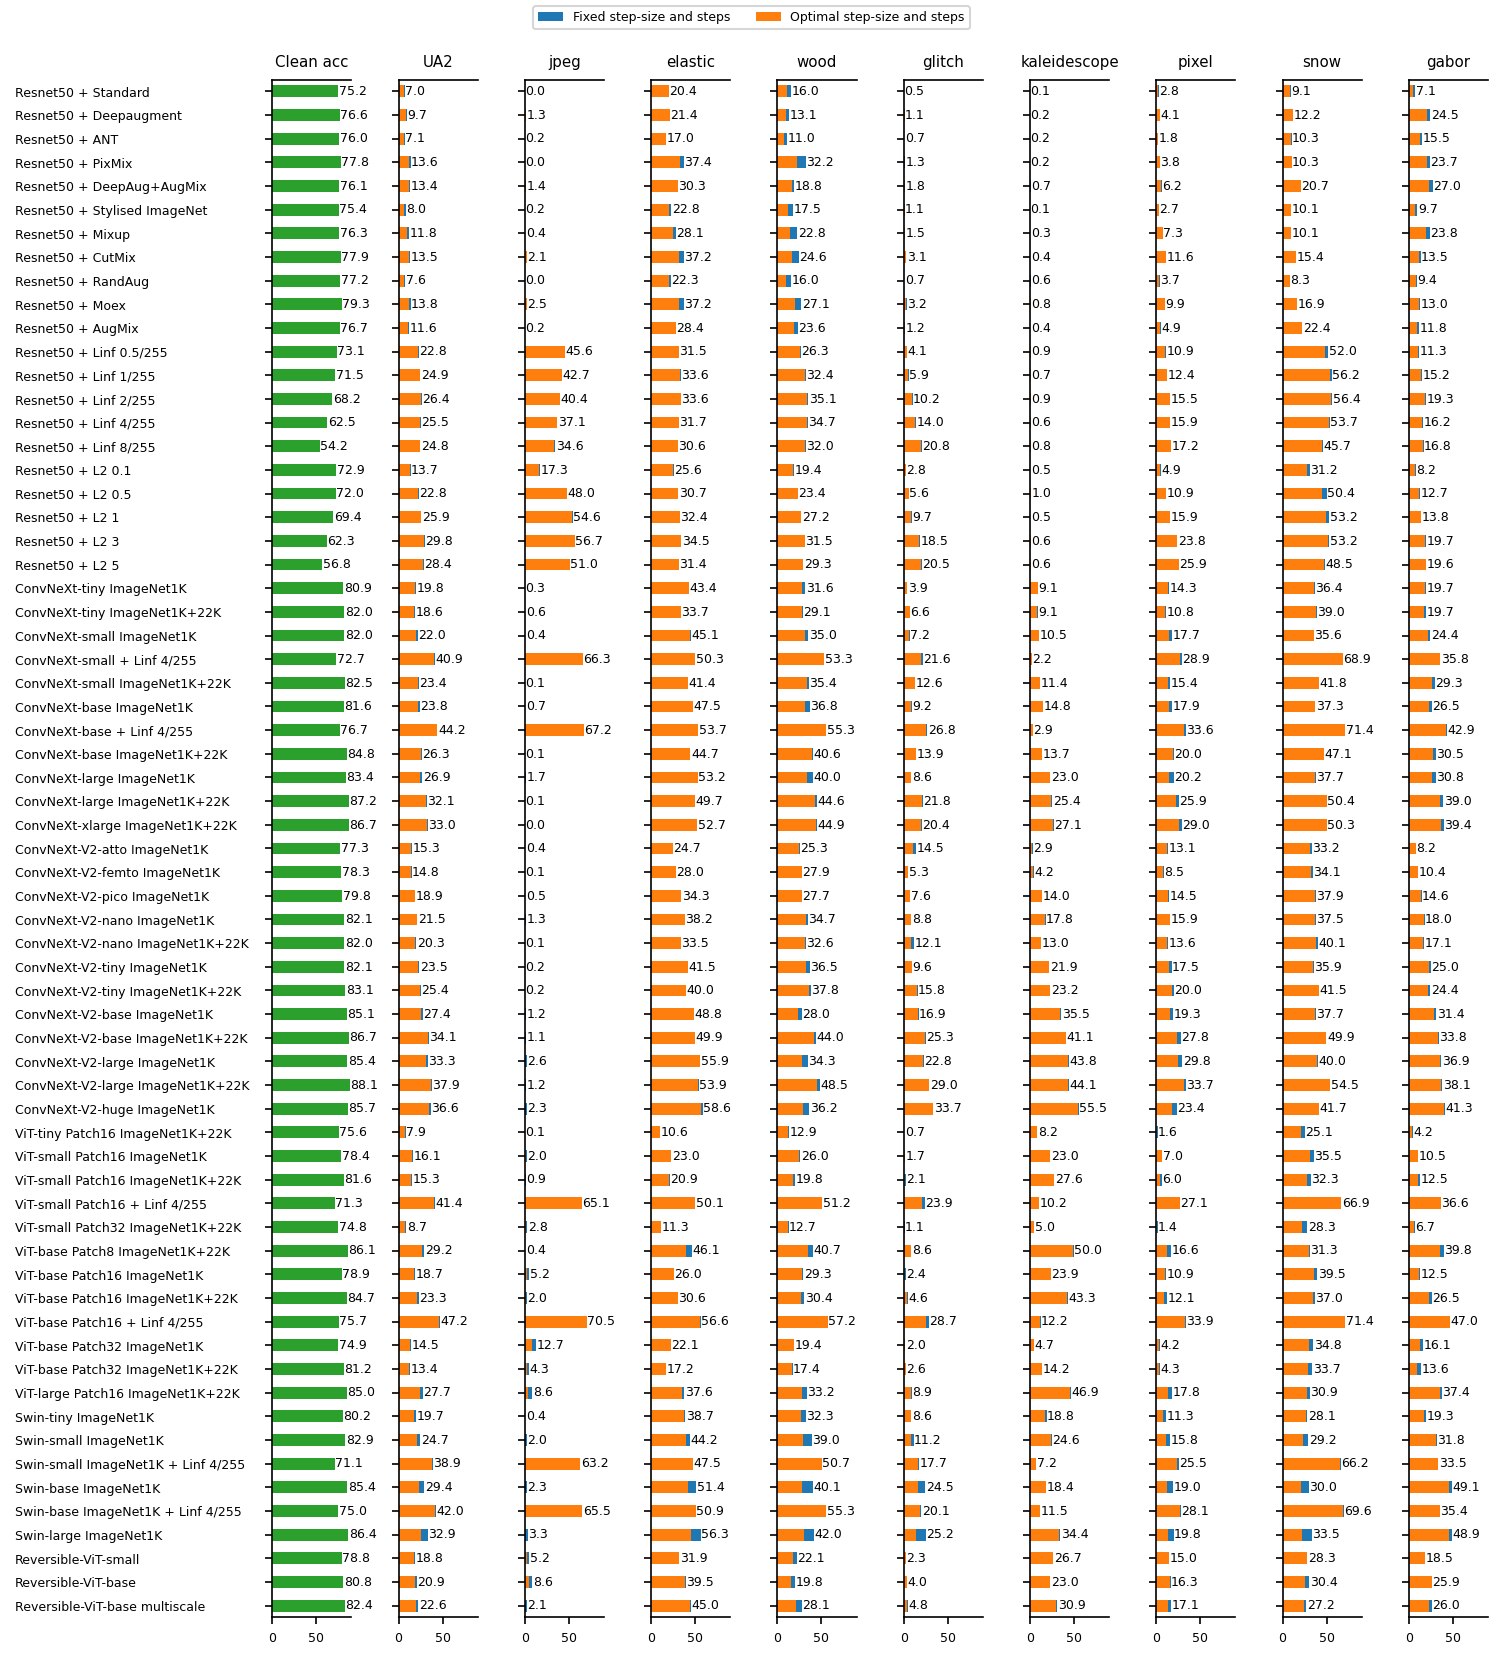

{'jpeg': 0.0024, 'elastic': 0.003, 'wood': 0.005, 'glitch': 0.005, 'kaleidoscope': 0.005, 'pixel': 1.0, 'snow': 0.1, 'gabor': 0.0025}
{'jpeg': 80, 'elastic': 100, 'wood': 80, 'glitch': 90, 'kaleidoscope': 90, 'pixel': 100, 'snow': 100, 'gabor': 100}


In [4]:
distortion = 'low'
attack_steps = {'jpeg': 80, 'elastic': 100, 'wood': 80, 'glitch': 90, 'kaleidoscope': 90, \
                'pixel': 100, 'snow': 100, 'gabor': 100}
attack_stepsize = {'jpeg': 0.0024, 'elastic': 0.003, 'wood': 0.005, 'glitch': 0.005, 'kaleidoscope': 0.005, \
                   'pixel': 1.0, 'snow': 0.1, 'gabor': 0.0025}
key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                report_gridsearch(attacks, 'imagenet', logdir, epsilon=distortion, \
                               attack_stepsize=attack_stepsize, attack_steps=attack_steps)
generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                           file_name=f'UA2_bar_{distortion}.pdf', figsize=(10, 11), xlim=90, yticks_padding=120)
print(attack_stepsize2)
print(attack_steps2)

## Medium distortion

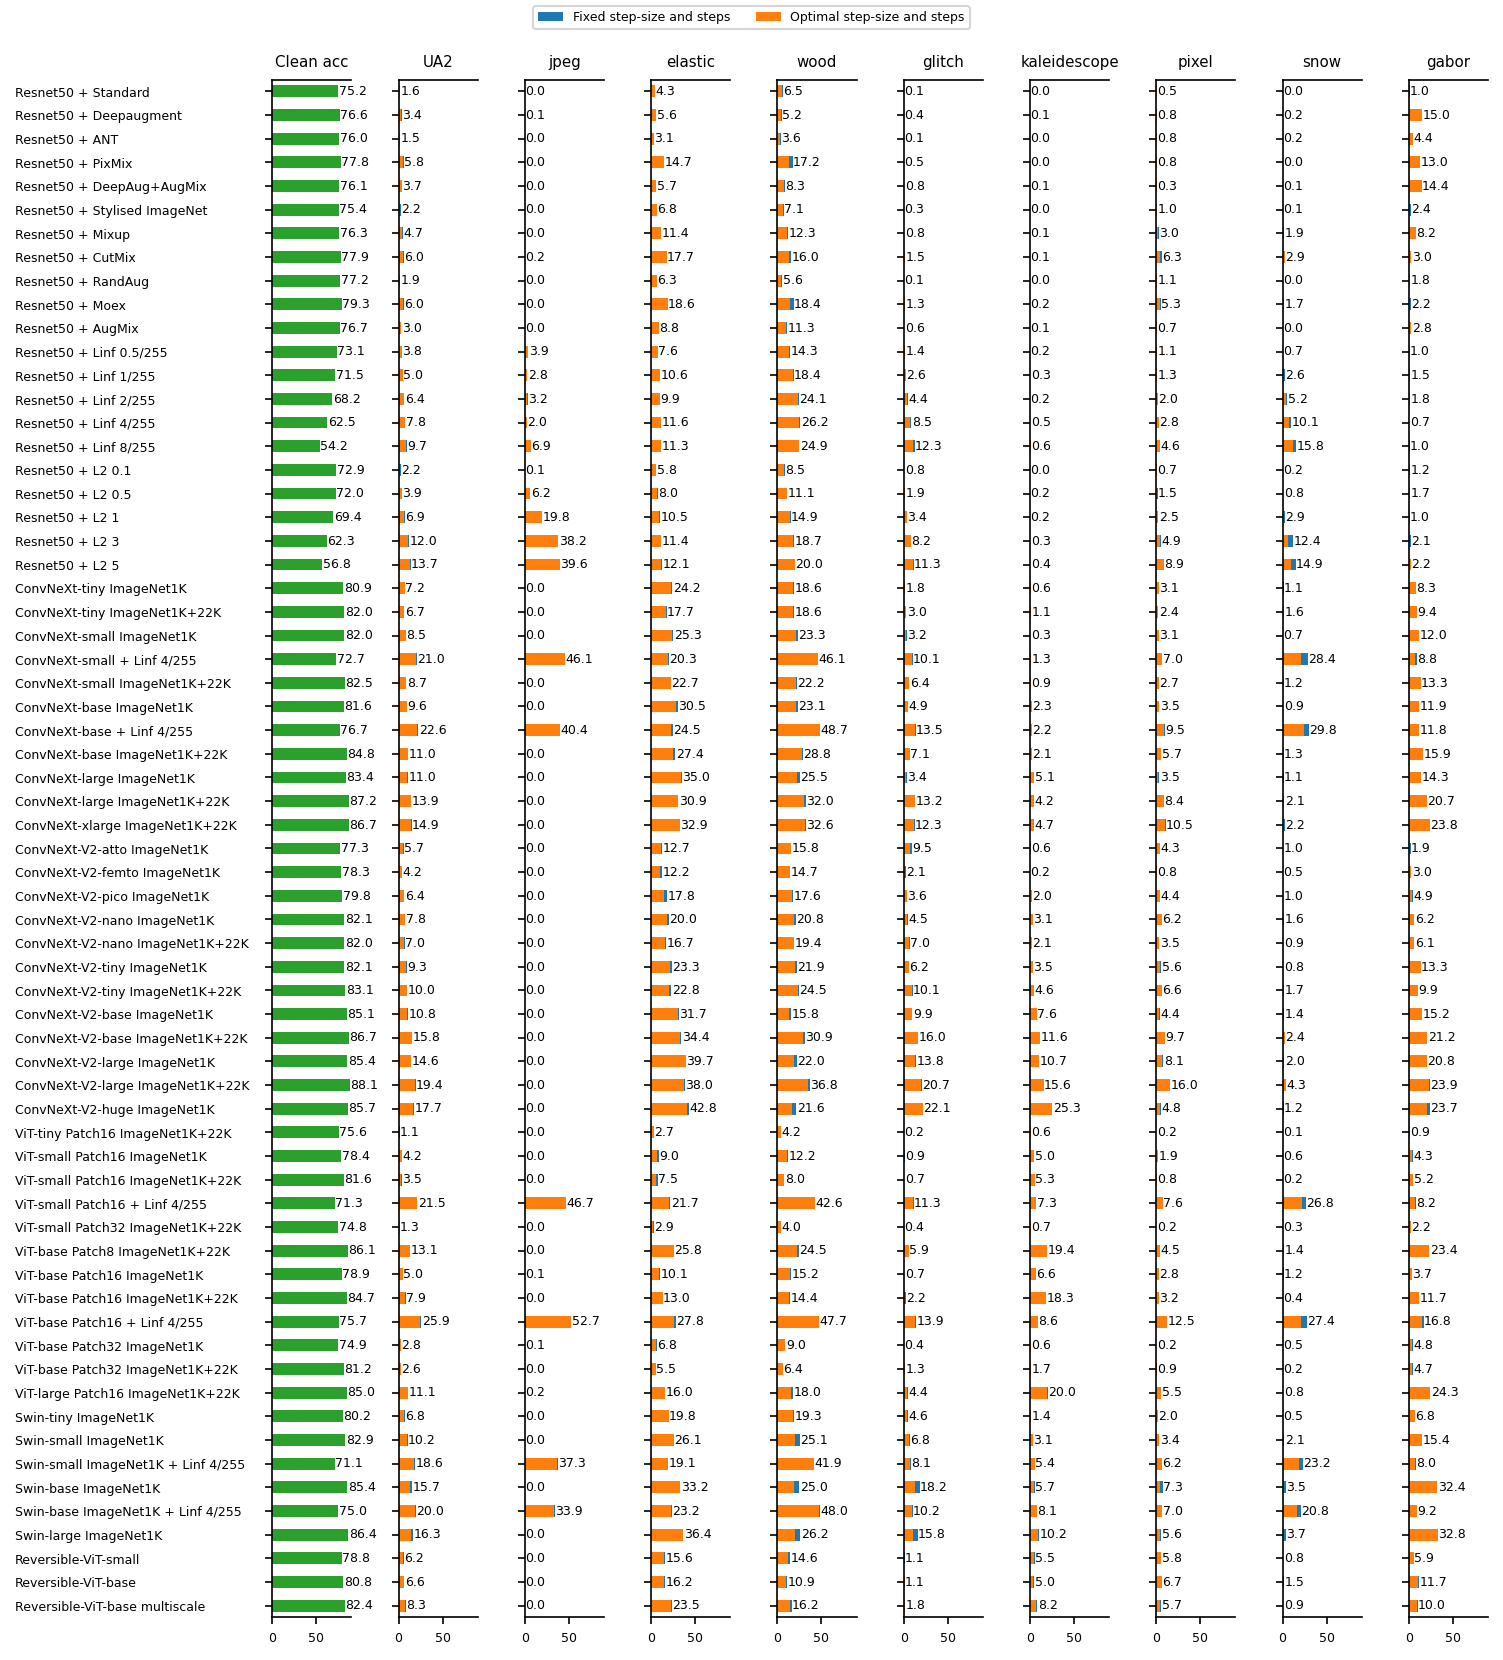

{'jpeg': 0.0024, 'elastic': 0.003, 'wood': 0.005, 'glitch': 0.005, 'kaleidoscope': 0.005, 'pixel': 1.0, 'snow': 0.1, 'gabor': 0.0025}
{'jpeg': 80, 'elastic': 100, 'wood': 80, 'glitch': 90, 'kaleidoscope': 90, 'pixel': 100, 'snow': 100, 'gabor': 100}


In [5]:
distortion = 'medium'
attack_steps = {'jpeg': 80, 'elastic': 100, 'wood': 80, 'glitch': 90, 'kaleidoscope': 90, \
                'pixel': 100, 'snow': 100, 'gabor': 100}
attack_stepsize = {'jpeg': 0.0024, 'elastic': 0.003, 'wood': 0.005, 'glitch': 0.005, 'kaleidoscope': 0.005, \
                   'pixel': 1.0, 'snow': 0.1, 'gabor': 0.0025}
key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                report_gridsearch(attacks, 'imagenet', logdir, epsilon=distortion, \
                               attack_stepsize=attack_stepsize, attack_steps=attack_steps)
generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                           file_name=f'UA2_bar_{distortion}.pdf', figsize=(10, 11), xlim=90, yticks_padding=120)
print(attack_stepsize2)
print(attack_steps2)

## High distortion

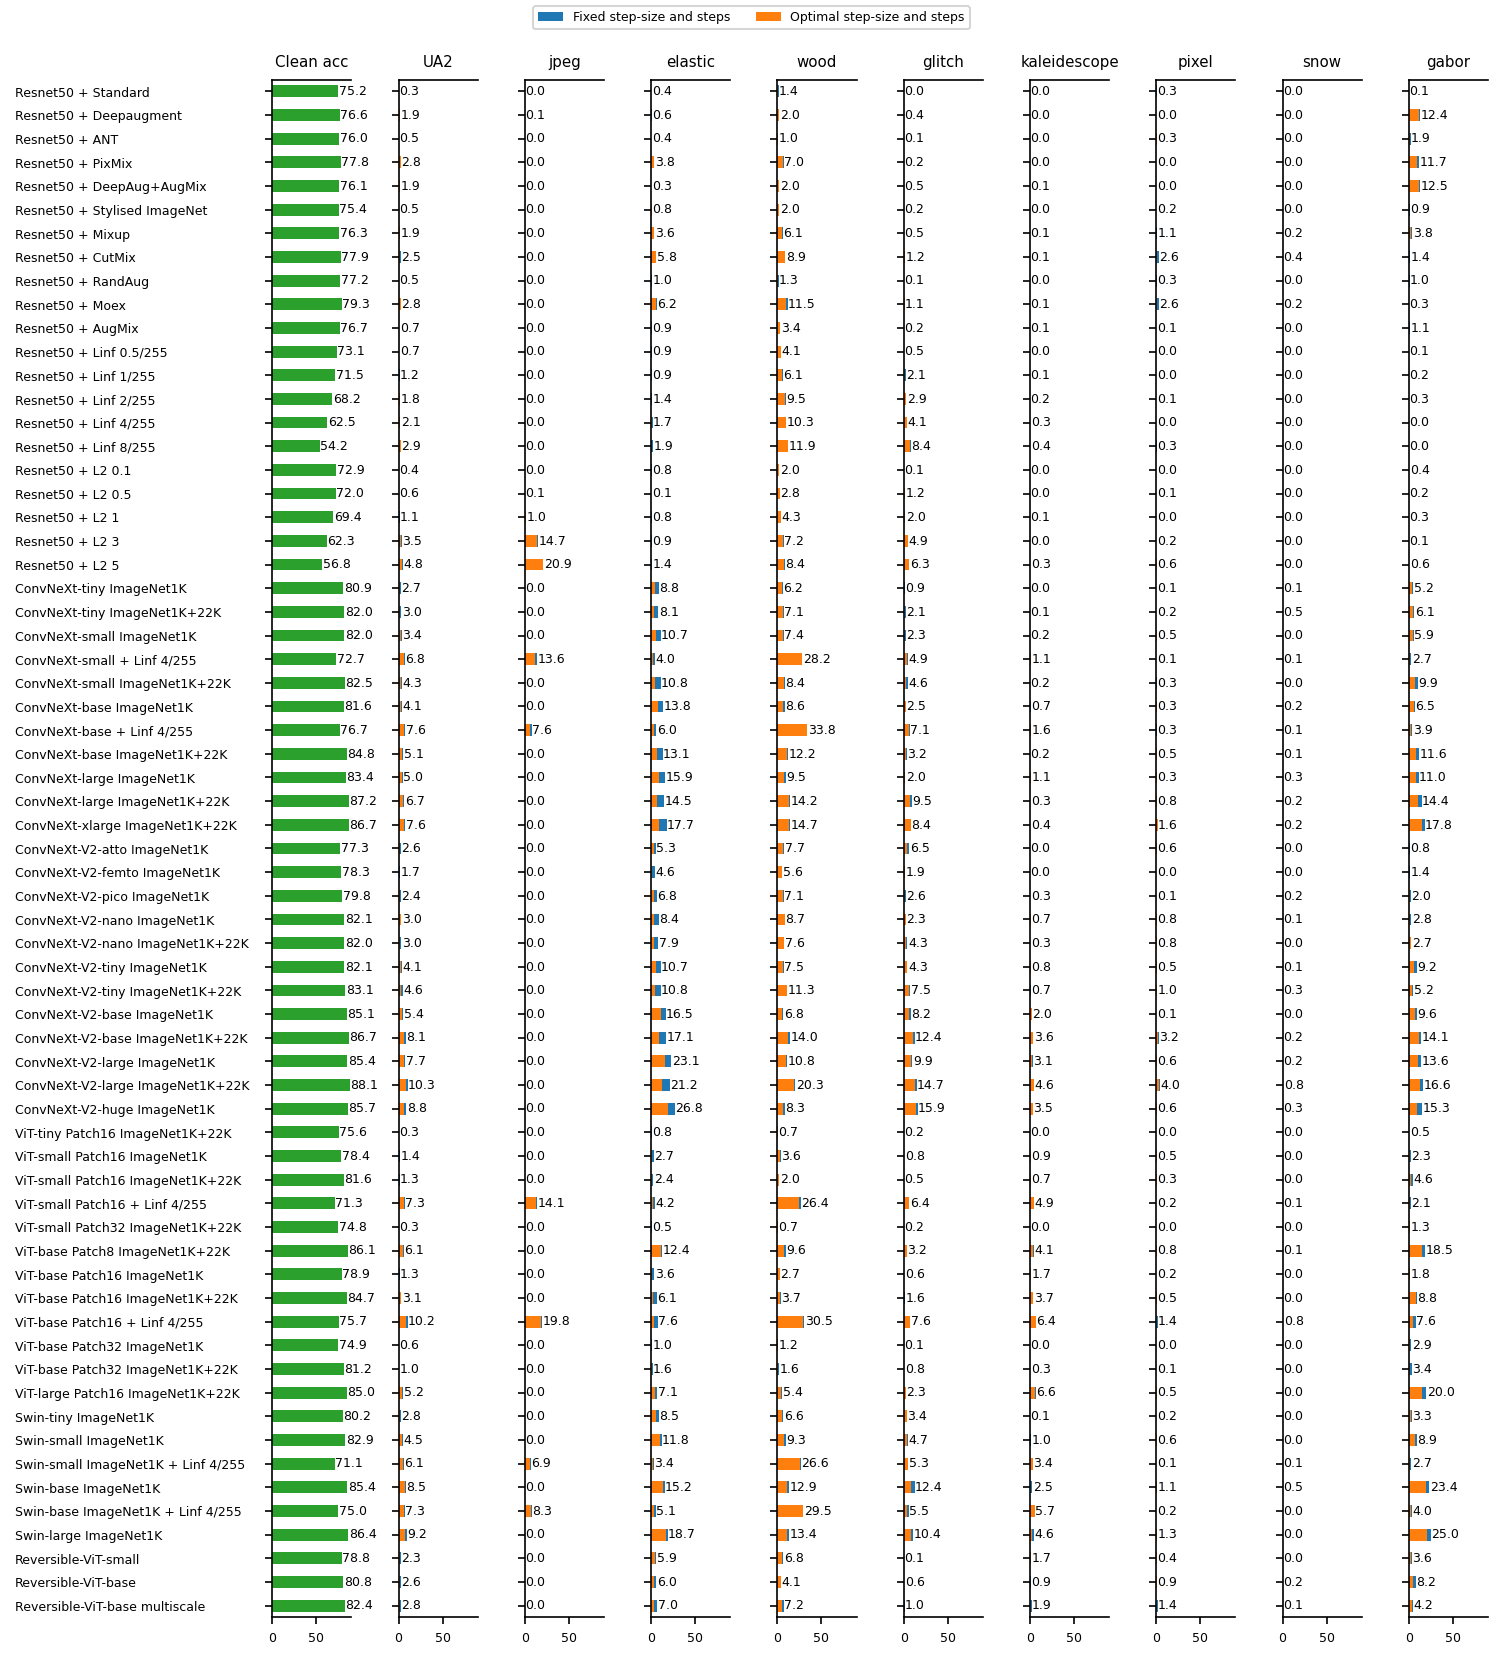

{'jpeg': 0.0024, 'elastic': 0.003, 'wood': 0.005, 'glitch': 0.005, 'kaleidoscope': 0.005, 'pixel': 1.0, 'snow': 0.1, 'gabor': 0.0025}
{'jpeg': 80, 'elastic': 100, 'wood': 80, 'glitch': 90, 'kaleidoscope': 90, 'pixel': 100, 'snow': 100, 'gabor': 100}


In [6]:
distortion = 'high'
attack_steps = {'jpeg': 80, 'elastic': 100, 'wood': 80, 'glitch': 90, 'kaleidoscope': 90, \
                'pixel': 100, 'snow': 100, 'gabor': 100}
attack_stepsize = {'jpeg': 0.0024, 'elastic': 0.003, 'wood': 0.005, 'glitch': 0.005, 'kaleidoscope': 0.005, \
                   'pixel': 1.0, 'snow': 0.1, 'gabor': 0.0025}
key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                report_gridsearch(attacks, 'imagenet', logdir, epsilon=distortion, \
                               attack_stepsize=attack_stepsize, attack_steps=attack_steps)
generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                           file_name=f'UA2_bar_{distortion}.pdf', figsize=(10, 11), xlim=90, yticks_padding=120)
print(attack_stepsize2)
print(attack_steps2)

# Extra attacks

In [7]:
attacks = "edge fbm  klotski texture mix polkadot prison blur  whirlpool fog hsv".split()

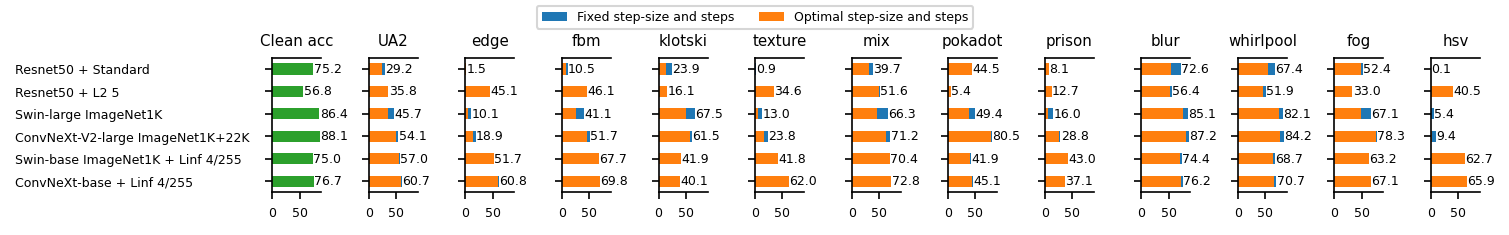

{'edge': 0.005, 'fbm': 0.003, 'klotski': 0.01, 'texture': 0.00075, 'mix': 0.5, 'polkadot': 0.15, 'prison': 0.00075, 'blur': 0.0075, 'whirlpool': 1.0, 'fog': 0.05, 'hsv': 0.0015}
{'edge': 30, 'fbm': 20, 'klotski': 20, 'texture': 20, 'mix': 20, 'polkadot': 20, 'prison': 40, 'blur': 1, 'whirlpool': 3, 'fog': 10, 'hsv': 20}


In [8]:
distortion = 'low'
attack_steps = None
attack_stepsize = None
key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                report_gridsearch(attacks, 'imagenet_diverse', logdir, epsilon=distortion, \
                               attack_stepsize=attack_stepsize, attack_steps=attack_steps)
generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                           file_name=f'UA2_bar_{distortion}_extra_attacks.pdf', \
                           figsize=(10, 1.5), xlim=90, yticks_padding=120, plot_height=0.95)
print(attack_stepsize2)
print(attack_steps2)

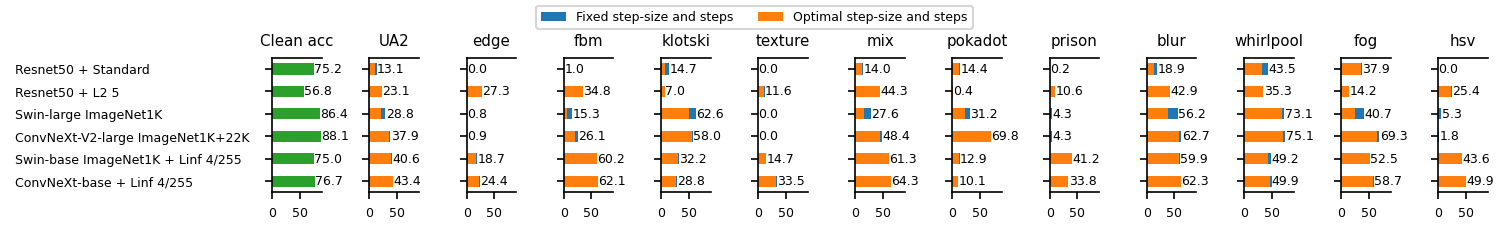

{'edge': 0.02, 'fbm': 0.006, 'klotski': 0.01, 'texture': 0.003, 'mix': 1.0, 'polkadot': 0.3, 'prison': 0.0015, 'blur': 0.03, 'whirlpool': 4.0, 'fog': 0.05, 'hsv': 0.006}
{'edge': 30, 'fbm': 30, 'klotski': 30, 'texture': 40, 'mix': 50, 'polkadot': 40, 'prison': 40, 'blur': 9, 'whirlpool': 20, 'fog': 20, 'hsv': 10}


In [9]:
distortion = 'medium'
attack_steps = None
attack_stepsize = None
key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                report_gridsearch(attacks, 'imagenet_diverse', logdir, epsilon=distortion, \
                               attack_stepsize=attack_stepsize, attack_steps=attack_steps)
generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                           file_name=f'UA2_bar_{distortion}_extra_attacks.pdf', \
                           figsize=(10, 1.5), xlim=90, yticks_padding=120, plot_height=0.95)
print(attack_stepsize2)
print(attack_steps2)

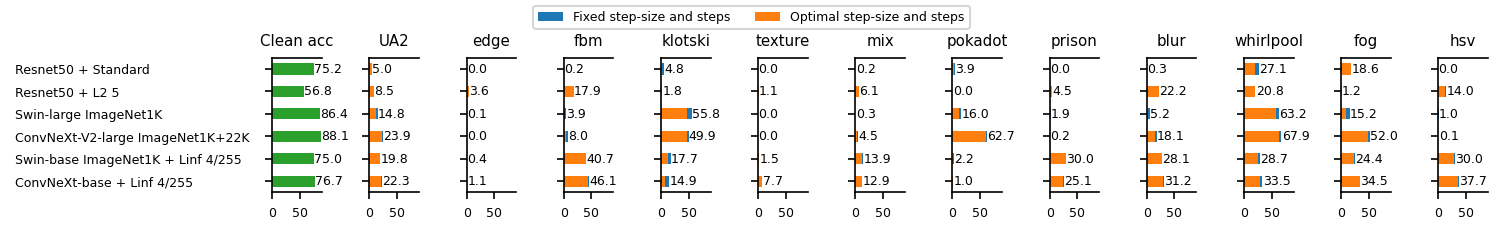

{'edge': 0.04, 'fbm': 0.012, 'klotski': 0.01, 'texture': 0.012, 'mix': 4.0, 'polkadot': 0.3, 'prison': 0.006, 'blur': 0.06, 'whirlpool': 8.0, 'fog': 0.05, 'hsv': 0.012}
{'edge': 60, 'fbm': 30, 'klotski': 40, 'texture': 80, 'mix': 70, 'polkadot': 40, 'prison': 30, 'blur': 40, 'whirlpool': 40, 'fog': 40, 'hsv': 20}


In [10]:
distortion = 'high'
attack_steps = None
attack_stepsize = None
key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                report_gridsearch(attacks, 'imagenet_diverse', logdir, epsilon=distortion, \
                               attack_stepsize=attack_stepsize, attack_steps=attack_steps)
generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                           file_name=f'UA2_bar_{distortion}_extra_attacks.pdf', \
                           figsize=(10, 1.5), xlim=90, yticks_padding=120, plot_height=0.95)
print(attack_stepsize2)
print(attack_steps2)

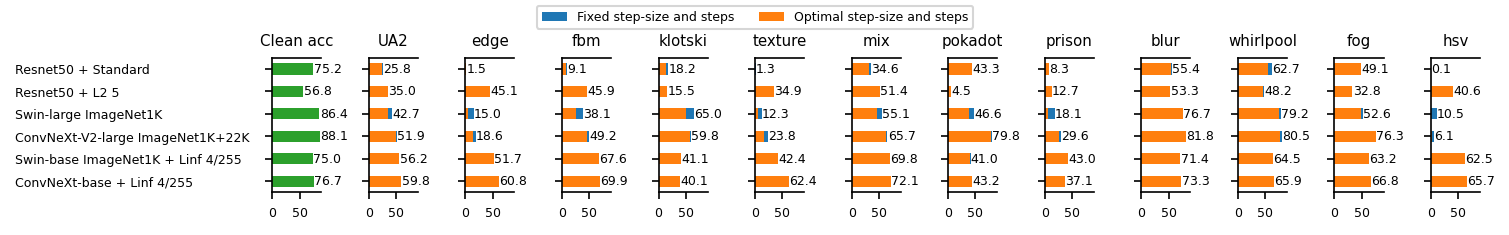

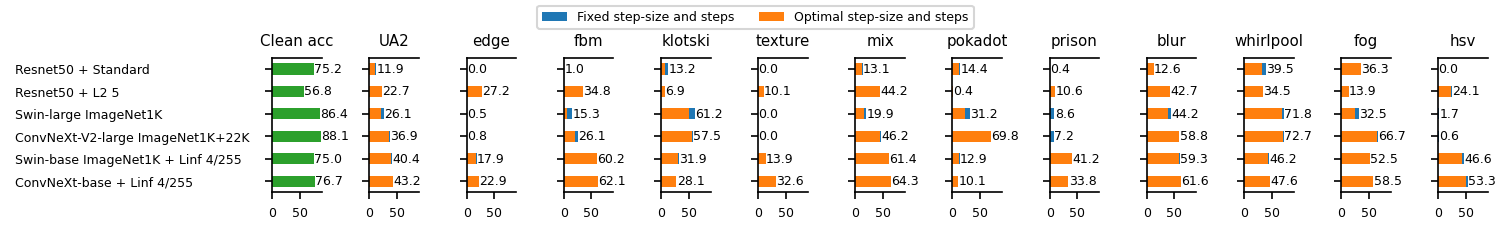

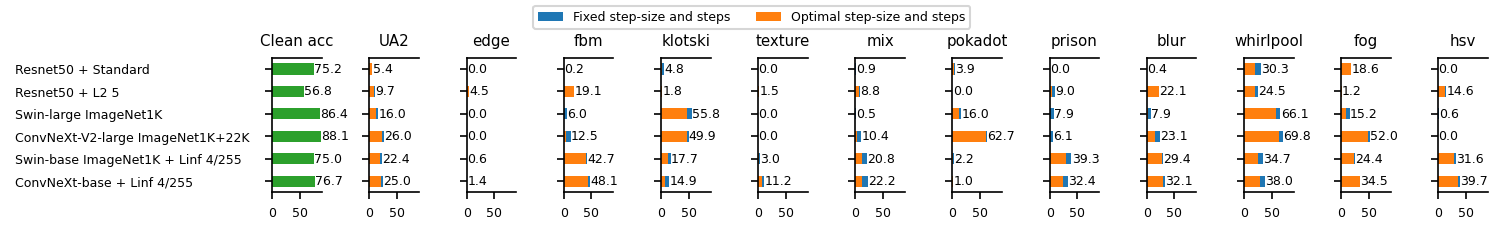

In [11]:
attack_stepsize = {'edge': 0.02, 'fbm': 0.006, 'klotski': 0.01, 'texture': 0.003, 'mix': 1.0, 'polkadot': 0.3, \
                   'prison': 0.0015, 'blur': 0.03, 'whirlpool': 4.0, 'fog': 0.05, 'hsv': 0.006}
attack_steps = {'edge': 60, 'fbm': 30, 'klotski': 40, 'texture': 80, 'mix': 70, 'polkadot': 40, \
                'prison': 30, 'blur': 40, 'whirlpool': 40, 'fog': 40, 'hsv': 20}


for distortion in ['low', 'medium', 'high']:
    key_dfs_fixed, key_dfs_optimal, attack_stepsize2, attack_steps2 = \
                    report_gridsearch(attacks, 'imagenet_diverse', logdir, epsilon=distortion, \
                                   attack_stepsize=attack_stepsize, attack_steps=attack_steps)
    generate_bar_chart_overlay(key_dfs_fixed, key_dfs_optimal, \
                               file_name=f'UA2_bar_{distortion}_extra_attacks.pdf', \
                               figsize=(10, 1.5), xlim=90, yticks_padding=120, plot_height=0.95)